In [ ]:
# Import Libraries/Dataset (0.25 mark)
# a. Import required libraries (recommended- use tensorflow/keras library).

from google.colab import drive
drive.mount('/content/drive')

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import random
import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy
import operator
import numpy as np
!pip install pycm
from pycm import *
from keras import backend as K
from keras import optimizers
from keras.callbacks import EarlyStopping, Callback
from keras.constraints import maxnorm
from keras.datasets import cifar10
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential, model_from_json , load_model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import np_utils
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# b. Import the dataset (use Google Drive if required).
    # Loading the Dataset from the Tensorflow Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
y_train_argmax = numpy.argmax(y_train , axis=1) 
y_test_argmax = numpy.argmax(y_test , axis=1) 




# c. Check the GPU available (recommended- use free GPU provided by Google Colab).
    # Use Google TPU is turned on in settings in Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#2. Data Visualization 
# a.   Show Example Images from CIFAR 10
j = 0
fig, ax = plt.subplots(2, 5)
# fig.set_dpi(2000)
fig.tight_layout()
ax= ax.reshape(10)
y = y_test.tolist()

for i , axes in zip(range(0,10) , ax):

  idx = y.index([i])
  img_arr = X_test[y.index([i])]
  img_np =  numpy.asarray(img_arr)
  axes.imshow(numpy.real(img_np), interpolation='nearest')
  axes.set_xlabel((Classes[int(y_test[idx])]+' : '+str(y_test[idx])+''))
  axes.spines['right'].set_visible(False) 
  axes.spines['top'].set_visible(False)  
  axes.spines['left'].set_visible(False)  
  axes.spines['bottom'].set_visible(False)  
  axes.set_xticks([])
  axes.set_yticks([])
  j = j+1

# fig.set_dpi(300)
fig.tight_layout()


# b.   Show Example Images from CIFAR 10
print('X_train(Shape) = '+str(X_train.shape))
print('y_train(Shape) = '+str(y_train.shape))
print('X_test (Shape) = '+str(X_test.shape))
print('y_test (Shape) = '+str(y_test.shape))

X_train(Shape) = (50000, 32, 32, 3)
y_train(Shape) = (50000, 1)
X_test (Shape) = (10000, 32, 32, 3)
y_test (Shape) = (10000, 1)


In [ ]:
# 3 Data Preprocessing

# # normalize inputs from 0-255 to 0.0-1.0
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [ ]:
#4. Model Building
  # Create the model
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),kernel_regularizer=regularizers.l2(weight_decay), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(weight_decay), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(weight_decay), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(weight_decay), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(weight_decay), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))



#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)


model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
# 5. Model Compilation

nadam=keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=nadam, metrics=['accuracy'])

Epoch 1/40
782/782 [==============================] - 9s 12ms/step - loss: 1.7638 - accuracy: 0.4699 - val_loss: 1.2890 - val_accuracy: 0.5741
Epoch 2/40
782/782 [==============================] - 9s 11ms/step - loss: 1.1358 - accuracy: 0.6368 - val_loss: 1.2621 - val_accuracy: 0.6198
Epoch 3/40
782/782 [==============================] - 9s 11ms/step - loss: 0.9182 - accuracy: 0.7026 - val_loss: 1.1240 - val_accuracy: 0.6475
Epoch 4/40
782/782 [==============================] - 9s 11ms/step - loss: 0.8129 - accuracy: 0.7388 - val_loss: 0.7901 - val_accuracy: 0.7475
Epoch 5/40
782/782 [==============================] - 9s 11ms/step - loss: 0.7390 - accuracy: 0.7667 - val_loss: 0.8463 - val_accuracy: 0.7357
Epoch 6/40
782/782 [==============================] - 9s 11ms/step - loss: 0.6941 - accuracy: 0.7846 - val_loss: 0.6763 - val_accuracy: 0.7952
Epoch 7/40
782/782 [==============================] - 9s 11ms/step - loss: 0.6558 - accuracy: 0.8006 - val_loss: 0.9099 - val_accuracy: 0.7297

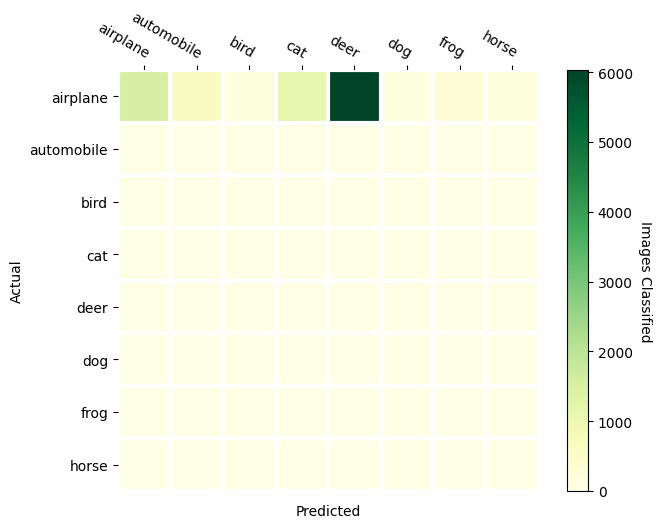

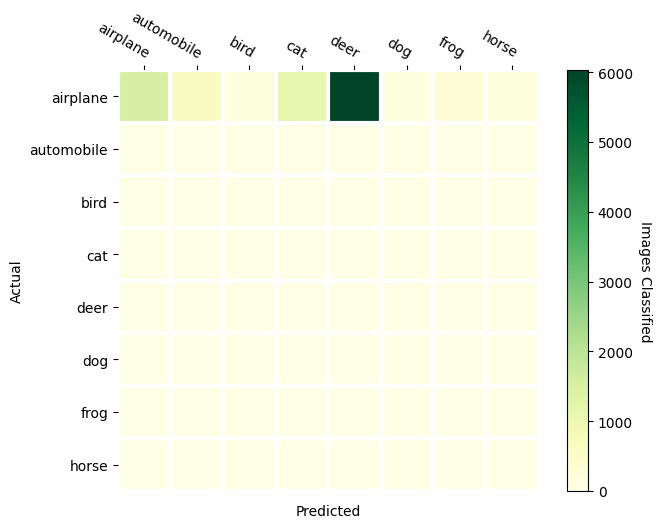

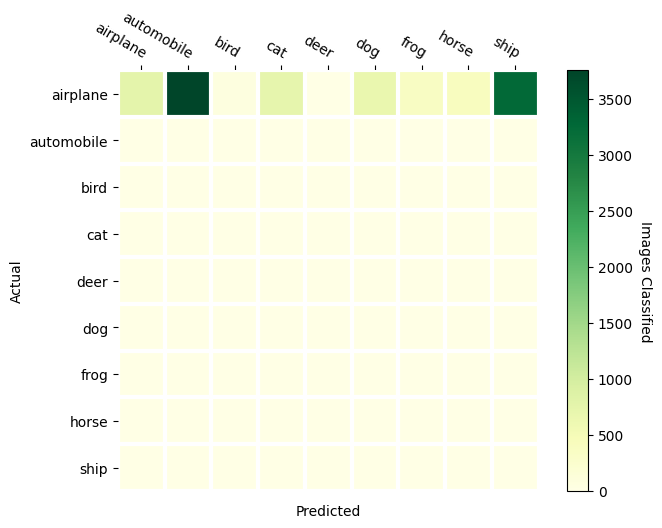

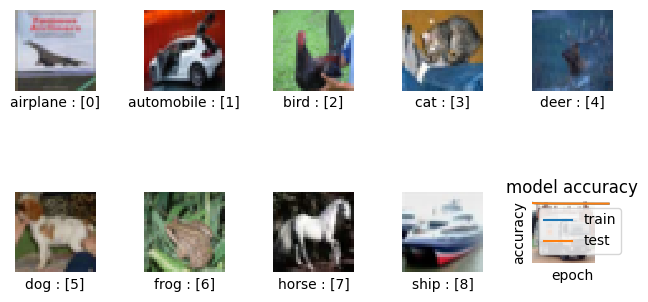

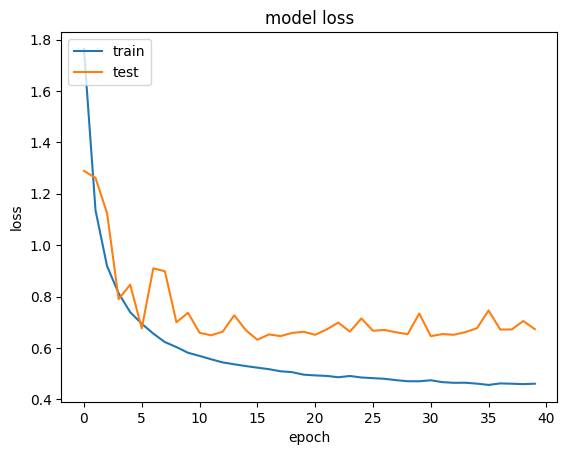

In [ ]:
# 6. Model Training

modeldetails = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=64 ) #epoch : 50

model.save('/content/drive/My Drive/Colab Notebooks/model.h5')

# list all data in history
print(modeldetails.history.keys())
# summarize history for accuracy
plt.plot(modeldetails.history['accuracy'])
plt.plot(modeldetails.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(modeldetails.history['loss'])
plt.plot(modeldetails.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# 7 Model Evaluation
model_loaded = load_model('/content/drive/My Drive/Colab Notebooks/model.h5')


# randomlist = []
# for i in range(0,4):
#   n = random.randint(1,10000)
#   randomlist.append(n)
# print('Testing Random Indexes :' + str(randomlist))


# for i in randomlist:
#   img_np =  numpy.asarray(X_test[i])
#   img = img_np.reshape(1, 32, 32, 3)
#   plt.imshow(numpy.real(img_np), interpolation='nearest')
#   plt.ylabel('ACTUAL : '+Classes[numpy.argmax(y_test[i])])
#   plt.xlabel('(Index :'+str(i) + ')  PREDICTED : '+Classes[numpy.argmax(model_loaded.predict(img))])
#   plt.show()

y_predicted = model_loaded.predict_classes(X_test)
y_test_argmax = numpy.argmax(y_test , axis=1)  



def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

cm = confusion_matrix(y_test_argmax, y_predicted)
ac = accuracy_score(y_test_argmax, y_predicted)
CM = ConfusionMatrix( y_test_argmax, y_predicted)
print('Accuracy : '+ str(ac*100)+'\n')
print('Confusion Matrix :\n\n')
CM.print_matrix()
#print(CM.TN)


fig, ax = plt.subplots()
# fig.set_dpi(60)
fig.tight_layout()
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
im, cbar = heatmap(cm, Classes, Classes, ax=ax,
                   cmap="YlGn", cbarlabel="Images Classified")

#print(max(modeldetails.history['val_accuracy']))


Accuracy : 84.92

Confusion Matrix :


Predict   0         1         2         3         4         5         6         7         8         9         
Actual
0         850       9         19        13        6         1         2         5         76        19        

1         8         929       0         2         2         0         3         2         17        37        

2         38        1         779       57        53        17        29        15        7         4         

3         12        2         35        775       39        53        41        21        16        6         

4         6         1         36        39        848       12        30        21        7         0         

5         8         2         30        195       31        682       13        30        7         2         

6         6         0         20        46        12        5         902       5         3         1         

7         9         1         14        37        38       

/usr/local/lib/python3.6/dist-packages/pycm/pycm_obj.py:115: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


In [ ]:
best_class = max(CM.F1.items(), key=operator.itemgetter(1))[0]
worst_class = min(CM.F1.items(), key=operator.itemgetter(1))[0]
print('Based on the F1 Score')
print('Best Performing Class : '+str(Classes[best_class]))
print('Worst Performing Class : '+str(Classes[worst_class]))
print('Complete Statistics : \n')
print(CM)

Based on the F1 Score
Best Performing Class : automobile
Worst Performing Class : cat
Complete Statistics : 

Predict   0         1         2         3         4         5         6         7         8         9         
Actual
0         850       9         19        13        6         1         2         5         76        19        

1         8         929       0         2         2         0         3         2         17        37        

2         38        1         779       57        53        17        29        15        7         4         

3         12        2         35        775       39        53        41        21        16        6         

4         6         1         36        39        848       12        30        21        7         0         

5         8         2         30        195       31        682       13        30        7         2         

6         6         0         20        46        12        5         902       5         3         

/usr/local/lib/python3.6/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


**PART 2:**
Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. 
1. Regularization: Train a model without regularization 
2. Dropout: Change the position and value of dropout layer 
Write a comparison between each model and give reasons for the difference in results. Also, make a comparison with the state-of-the-art accuracy for this dataset. 

In [2]:
# Import Libraries/Dataset (0.25 mark)
# a. Import required libraries (recommended- use tensorflow/keras library).

from google.colab import drive
drive.mount('/content/drive')

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import random
import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy
import operator
import numpy as np
!pip install pycm
from pycm import *
from keras import backend as K
from keras import optimizers
from keras.callbacks import EarlyStopping, Callback
from keras.constraints import maxnorm
from keras.datasets import cifar10
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential, model_from_json , load_model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import np_utils
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# b. Import the dataset (use Google Drive if required).
    # Loading the Dataset from the Tensorflow Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
y_train_argmax = numpy.argmax(y_train , axis=1) 
y_test_argmax = numpy.argmax(y_test , axis=1) 




# c. Check the GPU available (recommended- use free GPU provided by Google Colab).
    # Use Google TPU is turned on in settings in Colab

Mounted at /content/drive
     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 563kB 11.7MB/s 
170500096/170498071 [==============================] - 4s 0us/step


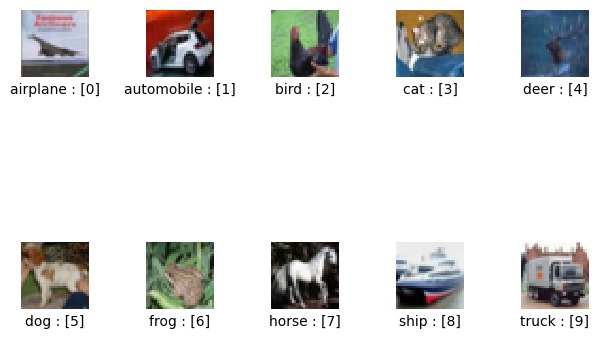

X_train(Shape) = (50000, 32, 32, 3)
y_train(Shape) = (50000, 1)
X_test (Shape) = (10000, 32, 32, 3)
y_test (Shape) = (10000, 1)


In [3]:
#2. Data Visualization 
# a.   Show Example Images from CIFAR 10
j = 0
fig, ax = plt.subplots(2, 5)
# fig.set_dpi(2000)
fig.tight_layout()
ax= ax.reshape(10)
y = y_test.tolist()

for i , axes in zip(range(0,10) , ax):

  idx = y.index([i])
  img_arr = X_test[y.index([i])]
  img_np =  numpy.asarray(img_arr)
  axes.imshow(numpy.real(img_np), interpolation='nearest')
  axes.set_xlabel((Classes[int(y_test[idx])]+' : '+str(y_test[idx])+''))
  axes.spines['right'].set_visible(False) 
  axes.spines['top'].set_visible(False)  
  axes.spines['left'].set_visible(False)  
  axes.spines['bottom'].set_visible(False)  
  axes.set_xticks([])
  axes.set_yticks([])
  j = j+1
  
plt.show()
# fig.set_dpi(300)
fig.tight_layout()



# b.   Show Example Images from CIFAR 10
print('X_train(Shape) = '+str(X_train.shape))
print('y_train(Shape) = '+str(y_train.shape))
print('X_test (Shape) = '+str(X_test.shape))
print('y_test (Shape) = '+str(y_test.shape))

In [4]:
# 3 Data Preprocessing

# # normalize inputs from 0-255 to 0.0-1.0
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [5]:
#4. Model Building
  # Create the model
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))



#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)


model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [6]:
# 5. Model Compilation

nadam=keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=nadam, metrics=['accuracy'])

Epoch 1/50
782/782 [==============================] - 7s 10ms/step - loss: 1.7403 - accuracy: 0.4600 - val_loss: 1.3607 - val_accuracy: 0.5508
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 1.0882 - accuracy: 0.6324 - val_loss: 0.9463 - val_accuracy: 0.6693
Epoch 3/50
782/782 [==============================] - 7s 9ms/step - loss: 0.8641 - accuracy: 0.7000 - val_loss: 0.7789 - val_accuracy: 0.7264
Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 0.7519 - accuracy: 0.7404 - val_loss: 0.8160 - val_accuracy: 0.7303
Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 0.6780 - accuracy: 0.7643 - val_loss: 0.7832 - val_accuracy: 0.7332
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 0.6118 - accuracy: 0.7871 - val_loss: 0.6230 - val_accuracy: 0.7856
Epoch 7/50
782/782 [==============================] - 7s 9ms/step - loss: 0.5673 - accuracy: 0.8042 - val_loss: 0.6737 - val_accuracy: 0.7756
Epoch

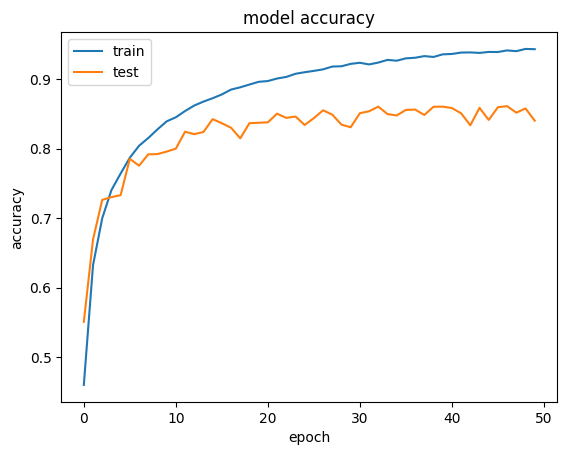

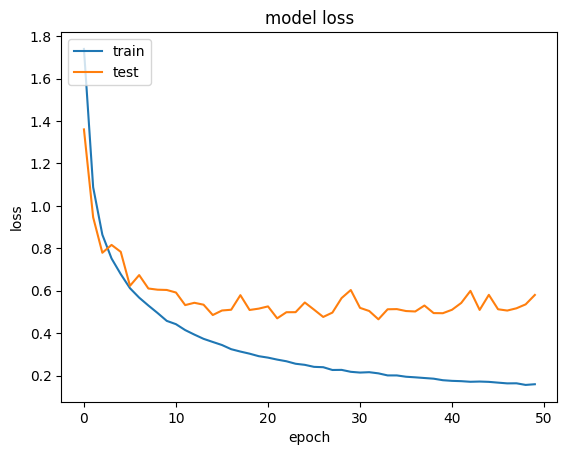

In [7]:
# 6. Model Training

modeldetails = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64 ) #epoch : 50

model.save('/content/drive/My Drive/Colab Notebooks/model_No_Regularisation.h5')
fig2 = plt.figure()
# list all data in history
#print(modeldetails.history.keys())
# summarize history for accuracy
plt.plot(modeldetails.history['accuracy'])
plt.plot(modeldetails.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(modeldetails.history['loss'])
plt.plot(modeldetails.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
# 7 Model Evaluation
model_loaded = load_model('/content/drive/My Drive/Colab Notebooks/model_ep_150_bt_64_nadam_l2_do.h5')


# randomlist = []
# for i in range(0,4):
#   n = random.randint(1,10000)
#   randomlist.append(n)
# print('Testing Random Indexes :' + str(randomlist))


# for i in randomlist:
#   img_np =  numpy.asarray(X_test[i])
#   img = img_np.reshape(1, 32, 32, 3)
#   plt.imshow(numpy.real(img_np), interpolation='nearest')
#   plt.ylabel('ACTUAL : '+Classes[numpy.argmax(y_test[i])])
#   plt.xlabel('(Index :'+str(i) + ')  PREDICTED : '+Classes[numpy.argmax(model_loaded.predict(img))])
#   plt.show()

y_predicted = model_loaded.predict_classes(X_test)
y_test_argmax = numpy.argmax(y_test , axis=1)  



def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

cm = confusion_matrix(y_test_argmax, y_predicted)
ac = accuracy_score(y_test_argmax, y_predicted)
CM = ConfusionMatrix( y_test_argmax, y_predicted)
print('Accuracy : '+ str(ac*100)+'\n')
print('Confusion Matrix :\n\n')
CM.print_matrix()
#print(CM.TN)


fig, ax = plt.subplots()
# fig.set_dpi(60)
fig.tight_layout()
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
im, cbar = heatmap(cm, Classes, Classes, ax=ax,
                   cmap="YlGn", cbarlabel="Images Classified")

#print(max(modeldetails.history['val_accuracy']))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy : 87.06

Confusion Matrix :


Predict   0         1         2         3         4         5         6         7         8         9         
Actual
0         881       10        18        12        19        2         7         3         30        18        

1         3         932       0         3         2         0         1         0         10        49        

2         43        0         804       44        52        19        22        8         6         2         

3         9         2         45        796       40        67        18        13        6         4         

4         5         2         18        28        900       8

/usr/local/lib/python3.6/dist-packages/pycm/pycm_obj.py:115: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


In [9]:
best_class = max(CM.F1.items(), key=operator.itemgetter(1))[0]
worst_class = min(CM.F1.items(), key=operator.itemgetter(1))[0]
print('Based on the F1 Score')
print('Best  Performing Class : '+str(Classes[best_class]))
print('Worst Performing Class : '+str(Classes[worst_class]))
print('Complete Statistics : \n')
print(CM)

Based on the F1 Score
Best  Performing Class : automobile
Worst Performing Class : cat
Complete Statistics : 

Predict   0         1         2         3         4         5         6         7         8         9         
Actual
0         881       10        18        12        19        2         7         3         30        18        

1         3         932       0         3         2         0         1         0         10        49        

2         43        0         804       44        52        19        22        8         6         2         

3         9         2         45        796       40        67        18        13        6         4         

4         5         2         18        28        900       8         11        21        6         1         

5         8         0         38        123       34        770       7         15        2         3         

6         5         4         22        43        15        10        892       5         4        

/usr/local/lib/python3.6/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


**Conclusion:**
**Regularization** helps when the model is suffering from a high variance problem where the network overfits to the training data but fails to generalize new features.
Thus, removing Regularization is causing drop in accuracy of the model.

**Dropout** helps to decrease the co-dependency amongst neurons during training which may result in overfitting in the network.Dropout increases number of iterations required to converge but the training time for each epoch is less.
Hence, Removing Dropout caused
				-- 	decrease in accuracy of the model.
				--	increase in runtime of the model.
Changing the layer for Dropout causes the accuracy to decrease as we move the dropout from initial layer to subsequent layers. 
Thus, earlier we use dropout better is the accuracy of the model